In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split



# Load the dataset
data = pd.read_csv('/home/dexter/filtring/UIUX.csv')


2024-05-29 22:57:59.534293: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 22:58:00.426159: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 22:58:02.775934: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 22:58:15.625103: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/dexter/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is 

In [2]:
data

,job_title,salary_range,posted_date
0,UX Designer,"£45,000 - £75,000",2023-02-20
1,UX Designer,"£45,000 - £75,000",2022-04-20
2,UX Designer,"£45,000 - £75,000",2023-01-22
3,UX Designer,"£45,000 - £75,000",2021-05-15
4,UX Designer,"£45,000 - £75,000",2021-05-15
...,...,...,...
68,UX Designer,"£31,000 - £61,000",2021-09-15
69,UX Designer,"£31,000 - £61,000",2021-08-30
70,UX Designer,"£31,000 - £61,000",2021-08-15
71,UX Designer,"£31,000 - £61,000",2021-07-30


In [3]:
# Select the relevant column (date)
data = data[['posted_date']]

# Convert 'posted_date' to datetime objects
data['posted_date'] = pd.to_datetime(data['posted_date'])

# Sort data by date
data = data.sort_values('posted_date')

# Create a numerical representation of the dates (days since a reference date)
reference_date = data['posted_date'].min()
data['days_since'] = (data['posted_date'] - reference_date).dt.days

# Check for NaN values in 'days_since'
print("NaN values in 'days_since':", data['days_since'].isnull().sum())

# Drop rows with NaN values in 'days_since'
data = data.dropna(subset=['days_since'])

# Use only the 'days_since' column for prediction
date_data = data['days_since'].values.reshape(-1, 1)

# Check for NaN values
print("NaN values in date_data before scaling:", np.isnan(date_data).sum())

# Normalize date data
scaler = MinMaxScaler(feature_range=(0, 1))
date_data = scaler.fit_transform(date_data)

# Check for NaN values after scaling
print("NaN values in date_data after scaling:", np.isnan(date_data).sum())

# If there are any NaN values after scaling, they need to be removed
nan_indices = np.isnan(date_data).flatten()
date_data = date_data[~nan_indices]

print("NaN values removed. New shape of date_data:", date_data.shape)


NaN values in 'days_since': 0
NaN values in date_data before scaling: 0
NaN values in date_data after scaling: 0
NaN values removed. New shape of date_data: (73, 1)


/tmp/ipykernel_77386/442334435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['posted_date'] = pd.to_datetime(data['posted_date'])


In [4]:
# Prepare data for LSTM (create sequences)
look_back = 30  # Number of previous days to consider
X, Y = [], []
for i in range(look_back, len(date_data)):
    X.append(date_data[i - look_back:i])
    Y.append(date_data[i])

X = np.array(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check for NaN values in X and Y
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in Y_train:", np.isnan(Y_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in Y_test:", np.isnan(Y_test).sum())

NaN values in X_train: 0
NaN values in Y_train: 0
NaN values in X_test: 0
NaN values in Y_test: 0


Epoch 1/100


/home/dexter/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - loss: 0.6199 - val_loss: 0.3179
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2835 - val_loss: 0.0705
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0598 - val_loss: 0.0094
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0123 - val_loss: 0.0836
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0828 - val_loss: 0.0415
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0418 - val_loss: 0.0030
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0038 - val_loss: 0.0052
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0039 - val_loss: 0.0190
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0154 - val_loss: 0.0252
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0208 - val_loss: 0.0215
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0171 - val_loss: 0.0120
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0092 - val_loss: 0.0036


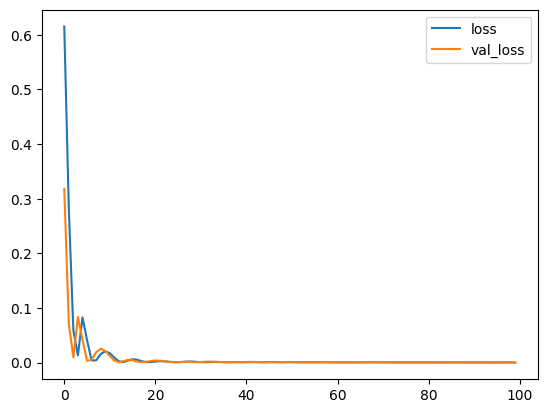

In [5]:
# Create the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(1)
])

# Use a smaller learning rate to check for numerical stability
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

# Save the model
model.save('lstm_software-tester_prediction_model.h5')

# Plot the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


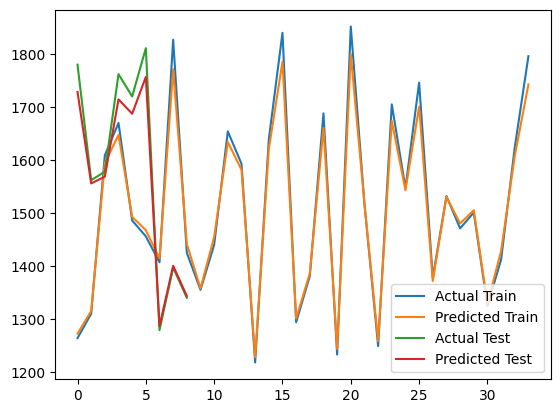

In [6]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to get actual date values
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape to 2D array
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape to 2D array

# Plot training and test predictions
plt.plot(Y_train, label='Actual Train')
plt.plot(train_predict, label='Predicted Train')
plt.plot(Y_test, label='Actual Test')
plt.plot(test_predict, label='Predicted Test')
plt.legend()
plt.show()


In [7]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('lstm_software-tester_prediction_model.h5')

# Recompile the model with the same loss and optimizer
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

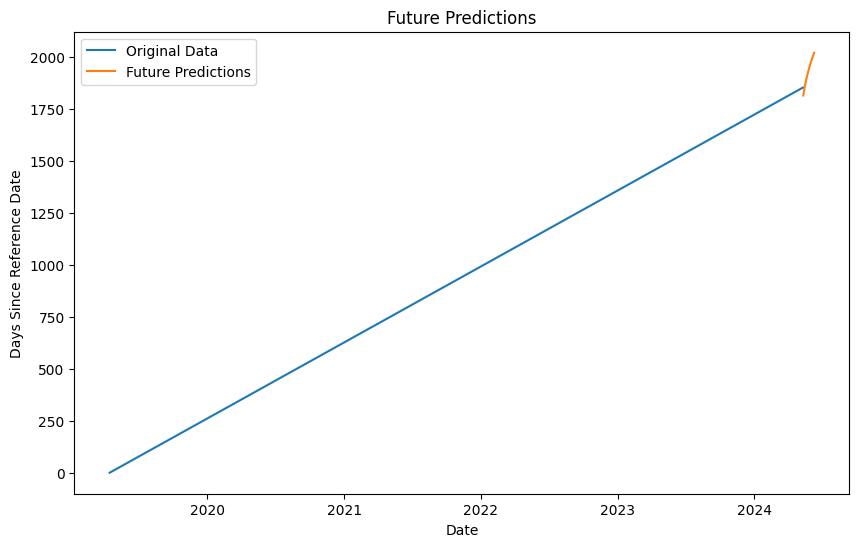

In [8]:
# Predict the next 30 days
future_days = 30
look_back = 30  # This should match the look_back value used during training
last_sequence = date_data[-look_back:]  # Get the last sequence to predict the next day

future_predictions = []
for _ in range(future_days):
    next_prediction = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_prediction[0, 0])
    # Update the last sequence with the new prediction
    last_sequence = np.append(last_sequence[1:], next_prediction)

# Invert the predictions to get actual date values
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Generate future dates
last_date = data['posted_date'].max()
future_dates = pd.date_range(last_date, periods=future_days + 1, inclusive='right')

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(data['posted_date'], data['days_since'], label='Original Data')
plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Days Since Reference Date')
plt.title('Future Predictions')
plt.show()


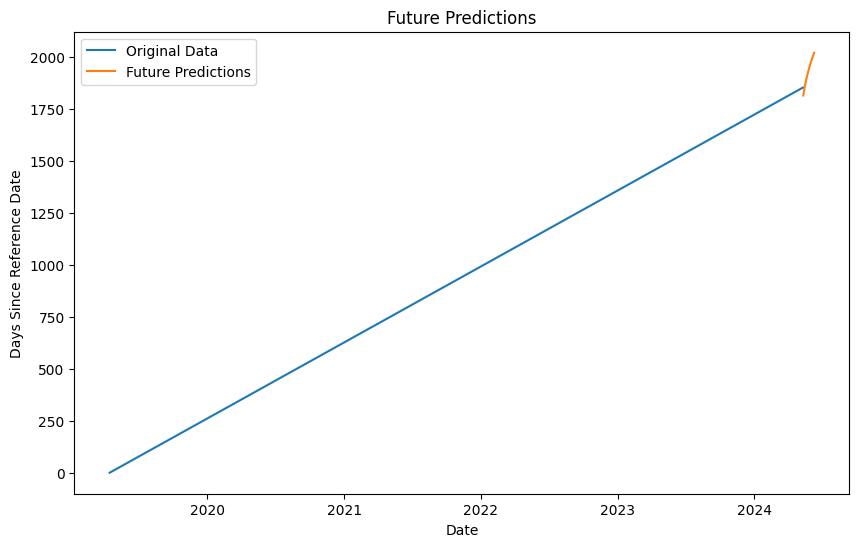

In [9]:
# Generate future dates
last_date = data['posted_date'].max()
future_dates = pd.date_range(last_date, periods=future_days + 1, inclusive='right')

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(data['posted_date'], data['days_since'], label='Original Data')
plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Days Since Reference Date')
plt.title('Future Predictions')
plt.show()
